In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import seaborn as sns
import requests
from datetime import datetime


# define function to convert to hourly time 
def to_hour(time):
    try:
        hour = datetime.strptime(str(time), '%H:%M')
        return int(datetime.strftime(hour, '%H'))
    except Exception:
        return 0

In [2]:
#Import dataset 1
acc = pd.read_csv('Accident_Information.csv', low_memory=False)
#Import dataset 2
pssn= pd.read_csv('Vehicle_Information.csv')

In [3]:
#Merge datasets
ScotTraffic = pd.merge(acc,pssn,how='inner',on='Accident_Index')

In [4]:
ScotTraffic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2058408 entries, 0 to 2058407
Data columns (total 57 columns):
Accident_Index                                 object
1st_Road_Class                                 object
1st_Road_Number                                float64
2nd_Road_Class                                 object
2nd_Road_Number                                float64
Accident_Severity                              object
Carriageway_Hazards                            object
Date                                           object
Day_of_Week                                    object
Did_Police_Officer_Attend_Scene_of_Accident    float64
Junction_Control                               object
Junction_Detail                                object
Latitude                                       float64
Light_Conditions                               object
Local_Authority_(District)                     object
Local_Authority_(Highway)                      object
Location_Easting_OS

In [5]:
#Focus on Scotland accidents
Scot=ScotTraffic[ScotTraffic['InScotland'] == 'No'].index
ScotTraffic.drop(Scot, inplace= True)

In [7]:
ScotTraffic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130358 entries, 104835 to 2058407
Data columns (total 57 columns):
Accident_Index                                 130358 non-null object
1st_Road_Class                                 130358 non-null object
1st_Road_Number                                130357 non-null float64
2nd_Road_Class                                 65486 non-null object
2nd_Road_Number                                128562 non-null float64
Accident_Severity                              130358 non-null object
Carriageway_Hazards                            130358 non-null object
Date                                           130358 non-null object
Day_of_Week                                    130358 non-null object
Did_Police_Officer_Attend_Scene_of_Accident    130357 non-null float64
Junction_Control                               130358 non-null object
Junction_Detail                                130358 non-null object
Latitude                                 

In [6]:
ScotTraffic.head()

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year_y
104835,200591NE00595,A,851.0,Unclassified,0.0,Slight,None,2005-01-08,Saturday,1.0,...,Skidded and overturned,No tow/articulation,Offside,3.0,Going ahead other,1,Car,No,Front,2005
104836,200591NE03012,A,835.0,NaN,0.0,Slight,None,2005-02-04,Friday,1.0,...,None,No tow/articulation,Did not leave carriageway,3.0,Going ahead left-hand bend,1,Goods 7.5 tonnes mgw and over,No,Offside,2005
104837,200591NE04169,A,832.0,NaN,0.0,Slight,None,2005-02-16,Wednesday,1.0,...,Skidded,No tow/articulation,Offside and rebounded,0.0,Going ahead left-hand bend,1,Car,No,Offside,2005
104838,200591NE04783,B,817.0,NaN,0.0,Slight,None,2005-02-23,Wednesday,1.0,...,Skidded,No tow/articulation,Nearside,0.0,Going ahead right-hand bend,1,Car,No,Front,2005
104839,200591NE04784,C,0.0,NaN,0.0,Slight,None,2005-02-23,Wednesday,1.0,...,Skidded and overturned,No tow/articulation,Nearside,0.0,Going ahead right-hand bend,1,Car,No,Offside,2005


In [7]:
ScotTraffic.rename(columns=
              {'Accident_Index'  :  'Accident Index',
               '1st_Road_Class' :  '1st Road Class',
               '1st_Road_Number' : '1st Road Number',
               '2nd_Road_Class' : '2nd Road Class',
               '2nd_Road_Number' : '2nd Road Number',
               'Accident_Severity' : 'Accident Severity',
               'Carriageway_Hazards' : 'Carriageway Hazards',
               'Date' : 'Date',
               'Day_of_Week' : 'Day of the Week',
               'Did_Police_Officer_Attend_Scene_of_Accident' : 'Did Police Officer Attend Scene?',
               'Junction_Control' : 'Junction Control',
               'Junction_Detail' : 'Junction Detail',
               'Latitude' : 'Latitude',
               'Light_Conditions' : 'Light Conditions',
               'Local_Authority_(District)' : 'Local Authority (District)',
               'Local_Authority_(Highway)' : 'Local Authority (Highway)',
               'Location_Easting_OSGR' : 'Location Easting OSGR',
               'Location_Northing_OSGR' : 'Location Northing OSGR',
               'Longitude' : 'Longitude',
               'LSOA_of_Accident_Location' : 'LSOA of Accident Location',
               'Number_of_Casualties' : 'Number of Casualties',
               'Number_of_Vehicles' : 'Number of Vehicles',
               'Pedestrian_Crossing-Human_Control' : 'Pedestrian Crossing Human Control',
               'Pedestrian_Crossing-Physical_Facilities' : 'Pedestrian Crossing Physical Facilities',
               'Police_Force' : 'Police Force',
               'Road_Surface_Conditions' : 'Road Surface Conditions',
               'Road_Type': 'Road Type',
               'Special_Conditions_at_Site' : 'Special Conditions at Site',
               'Speed_limit' : 'Speed limit',
               'Time' : 'Time',
               'Urban_or_Rural_Area' : 'Urban or Rural Area?',
               'Weather_Conditions' : 'Weather Conditions',
               'Year' : 'Year',
               'InScotland' : 'InScotland',
               'Age_Band_of_Driver' : 'Age Band of Driver',
               'Age_of_Vehicle' : 'Age of Vehicle',
               'Driver_Home_Area_Type' : 'Driver Home Area Type',
               'Driver_IMD_Decile' : 'Driver IMD Decile',
               'Engine_Capacity_.CC.' : 'Engine Capacity (CC)',
               'Hit_Object_in_Carriageway' : 'Hit Object in Carriageway?',
               'Hit_Object_off_Carriageway' : 'Hit Object off Carriageway?',
               'Journey_Purpose_of_Driver' : 'Journey Purpose of Driver',
               'Junction_Location' : 'Junction Location',
               'make' : 'Car Make',
               'model' : 'Car Model',
               'Propulsion_Code' : 'Propulsion Code',
               'Sex_of_Driver' : 'Sex of Driver',
               'Skidding_and_Overturning' : 'Skidding and Overturning?',
               'Towing_and_Articulation' : 'Towing and Articulation',
               'Vehicle_Leaving_Carriageway' : 'Did Vehicle Leave Carriageway?',
               'Vehicle_Location.Restricted_Lane' : 'Vehicle Location Restricted Lane',
               'Vehicle_Manoeuvre' : 'Vehicle Manoeuvre',
               'Vehicle_Reference' : 'Vehicle Reference',
               'Vehicle_Type' : 'Vehicle Type',
               'Was_Vehicle_Left_Hand_Drive' : 'Was Vehicle Left Hand Drive?',
               'X1st_Point_of_Impact' : '1st Point of Impact',
               'Year_y' : 'Year_y',
              }, inplace=True)

In [8]:
ScotTraffic.drop("1st Road Class", axis=1, inplace=True)

In [9]:
ScotTraffic['Hour of Day'] = ScotTraffic['Time'].apply(to_hour)

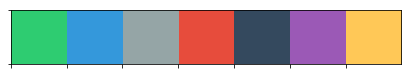

In [10]:
# creating colour palette with 7 colors (to use with day of week analysis)
colourchoice = ["#2ecc71", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#9b59b6", "#ffc857"]
sevenColorPalette = sns.color_palette(colourchoice, 7)
seven = sns.palplot(sevenColorPalette)

# display color palette
plt.show(seven)

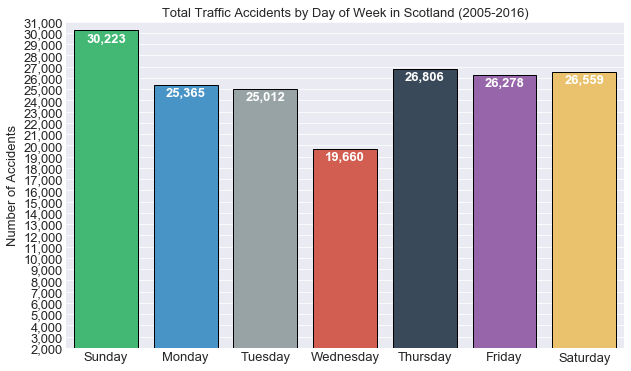

In [11]:
# Dataframe for Accidents by Day of Week
accidents_by_weeknum = ScotTraffic.groupby(['Day of the Week']).sum()['Number of Casualties'].to_frame().reset_index()

# Plot bars for Number of Accidents by Day of Week
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
b = sns.barplot(x='Day of the Week', y='Number of Casualties', data=accidents_by_weeknum,
                palette=sevenColorPalette, linewidth=1, edgecolor='black')

x_axis = np.arange(0,7,1)

# Calculate upper bound of y-axis
y_max = max(accidents_by_weeknum['Number of Casualties'])
# round the upper bound of y-axis up to nearest thousand
y_max -= y_max % -1000
step = 1000
y_axis = np.arange(2000, y_max+step, step)
y_axis_fmt = ["{:,.0f}".format(y) for y in y_axis]
plt.ylim(min(y_axis), max(y_axis))

plt.xticks(x_axis, ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), fontsize=13)
plt.yticks(y_axis, y_axis_fmt, fontsize=13)
plt.xlabel('')
plt.ylabel('Number of Accidents', fontsize=13)

# Add labels for bar values
ax = b.axes
for p in ax.patches:
    ax.annotate(s="{:,.0f}".format(p.get_height()), xy=((p.get_x() + p.get_width() / 2., p.get_height()-900)),
                ha='center', va='center', color='white', xytext=(0, 2), 
                textcoords='offset points', weight='bold', fontsize=13)  

plt.title('Total Traffic Accidents by Day of Week in Scotland (2005-2016)', fontsize=13)
plt.show()

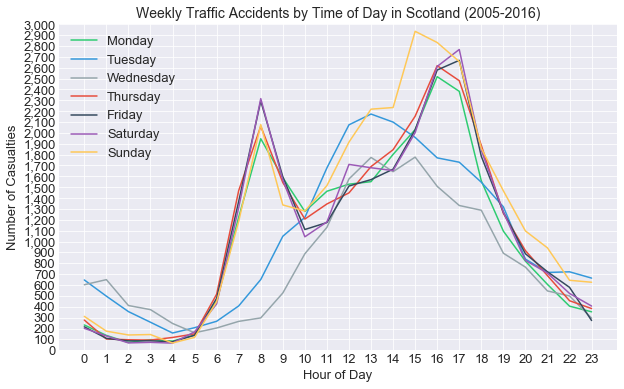

In [12]:
#Dataframe for Accidents by Hour of Day
accidents_by_hour = ScotTraffic.groupby(['Day of the Week',
                                        'Hour of Day']).sum()['Number of Casualties'].to_frame().reset_index()
accidents_by_hour_pivot = accidents_by_hour.pivot_table(values=['Number of Casualties'], 
                                                        index=['Hour of Day'], 
                                                        columns=['Day of the Week'])
accidents_by_hour_pivot.columns = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']

accidents_by_hour_pivot = accidents_by_hour.pivot_table(values=['Number of Casualties'], 
                                                        index=['Hour of Day'], 
                                                        columns=['Day of the Week'])
accidents_by_hour_pivot.columns = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
x_axis = accidents_by_hour_pivot.index



# Assigning colours for consistency
plt.figure(figsize=(10,6))
plt.plot(x_axis, accidents_by_hour_pivot['Monday'], color='#2ecc71')
plt.plot(x_axis, accidents_by_hour_pivot['Tuesday'], color='#3498db')
plt.plot(x_axis, accidents_by_hour_pivot['Wednesday'], color='#95a5ab')
plt.plot(x_axis, accidents_by_hour_pivot['Thursday'], color='#e74c3c')
plt.plot(x_axis, accidents_by_hour_pivot['Friday'], color='#34495e')
plt.plot(x_axis, accidents_by_hour_pivot['Saturday'], color='#9b59b6')
plt.plot(x_axis, accidents_by_hour_pivot['Sunday'], color='#ffc857')

# Determine y-axis
y_max = 3000
step = 100
y_axis = np.arange(0, y_max+step, step)
y_axis_fmt = ["{:,.0f}".format(y) for y in y_axis]
plt.ylim(min(y_axis), max(y_axis))

# Format axes ticks and labels
plt.xticks(np.arange(len(x_axis)), x_axis, fontsize=13)
plt.yticks(y_axis, y_axis_fmt, fontsize=13)
plt.xlabel('Hour of Day', fontsize=13)
plt.ylabel('Number of Casualties', fontsize=13)

plt.legend(fontsize=13, loc='upper left')
plt.title("Weekly Traffic Accidents by Time of Day in Scotland (2005-2016)", fontsize=14)
plt.show()

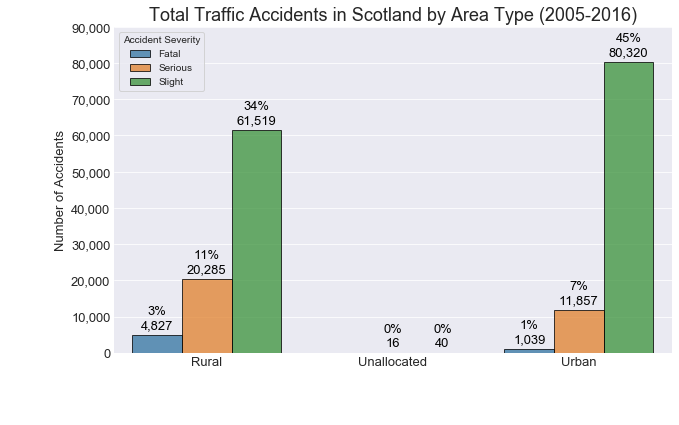

In [14]:
# Create Dataframe for Urban or Rural Area, Road Type and Sum for Number of Casualties
area_road_type = ScotTraffic.groupby(['Urban or Rural Area?',
                                     'Road Type',
                                    'Accident Severity']).sum()['Number of Casualties'].to_frame().reset_index()

# Convert Urban or Rural Area to 1 or 2
area_road_type['Urban or Rura Area'] = [str('Urban') if value==1 else str('Rural') if value==2 else str('Neither') 
                                         for value in area_road_type['Urban or Rural Area?']]
area_type = area_road_type.groupby(['Urban or Rural Area?', 'Accident Severity']).sum()['Number of Casualties'].to_frame().reset_index()
total_casualties = area_type['Number of Casualties'].sum()

road_type = area_road_type.groupby(['Urban or Rural Area?', 'Road Type']).sum()['Number of Casualties'].to_frame().reset_index()
urban_road = road_type.loc[road_type['Urban or Rural Area?']=='Urban',:].sort_values('Number of Casualties', 
                                                                                    ascending=False)
rural_road = road_type.loc[road_type['Urban or Rural Area?']=='Rural',:].sort_values('Number of Casualties', 
                                                                                    ascending=False)


plt.figure(figsize=(10,6))
g = sns.barplot(x='Urban or Rural Area?', y='Number of Casualties', hue='Accident Severity', data=area_type, linewidth=1, edgecolor='black', alpha=0.75)
sns.set_style('darkgrid')

# Determine y-axis
y_max = max(area_type['Number of Casualties'])+2500
y_max -= y_max % -10000
step = 10000
y_axis = np.arange(0, y_max+step, step)
y_axis_fmt = ["{:,.0f}".format(y) for y in y_axis]
plt.ylim(min(y_axis), max(y_axis))

# Format axes ticks and labels
plt.xticks(fontsize=13)
plt.yticks(y_axis, y_axis_fmt, fontsize=13)

plt.xlabel('')
plt.ylabel('Number of Accidents', fontsize=13)

ax = g.axes
for p in ax.patches:
    ax.annotate(s="{:,.0f}%".format((p.get_height()/total_casualties)*100)+"\n"+("{:,.0f}".format(p.get_height())), 
                xy=((p.get_x() + p.get_width() / 2., p.get_height()+4000)),
                ha='center', va='center', color='black', xytext=(0, 2), 
                textcoords='offset points', fontsize=13)  
plt.legend(loc='upper left', title='Accident Severity', frameon=True)
plt.title('Total Traffic Accidents in Scotland by Area Type (2005-2016)', fontsize=18)
plt.show()

In [10]:
ScotTraffic.to_csv(r'/Users/pake/Desktop/Merged Accidents.csv')

In [15]:
print(ScotTraffic)

        Accident Index  1st Road Number 2nd Road Class  2nd Road Number  \
104835   200591NE00595            851.0   Unclassified              0.0   
104836   200591NE03012            835.0            NaN              0.0   
104837   200591NE04169            832.0            NaN              0.0   
104838   200591NE04783            817.0            NaN              0.0   
104839   200591NE04784              0.0            NaN              0.0   
104840   200591NE04991           9176.0   Unclassified              0.0   
104841   200591NE05332              9.0            NaN              0.0   
104842   200591NE05637            834.0            NaN              0.0   
104843   200591NE05799              9.0   Unclassified              0.0   
104844   200591NE05799              9.0   Unclassified              0.0   
104845   200591NE06847             87.0            NaN              0.0   
104846   200591NE07090            817.0   Unclassified              0.0   
104847   200591NE08287   

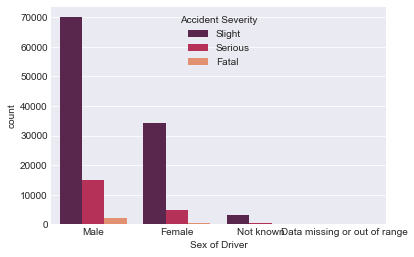

In [16]:
sns.countplot(x='Sex of Driver', data=ScotTraffic, hue='Accident Severity', palette='rocket')

TypeError: can't multiply sequence by non-int of type 'float'

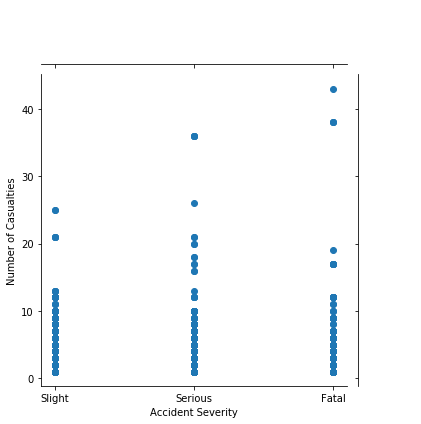

In [16]:
sns.jointplot(x='Accident Severity', y='Number of Casualties', data=ScotTraffic)

In [20]:
ScotTraffic.head()

,Accident Index,1st Road Number,2nd Road Class,2nd Road Number,Accident Severity,Carriageway Hazards,Date,Day of the Week,Did Police Officer Attend Scene?,Junction Control,...,Skidding and Overturning?,Towing and Articulation,Did Vehicle Leave Carriageway?,Vehicle Location Restricted Lane,Vehicle Manoeuvre,Vehicle Reference,Vehicle Type,Was Vehicle Left Hand Drive?,1st Point of Impact,Year_y
104835,200591NE00595,851.0,Unclassified,0.0,Slight,None,2005-01-08,Saturday,1.0,Give way or uncontrolled,...,Skidded and overturned,No tow/articulation,Offside,3.0,Going ahead other,1,Car,No,Front,2005
104836,200591NE03012,835.0,NaN,0.0,Slight,None,2005-02-04,Friday,1.0,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,3.0,Going ahead left-hand bend,1,Goods 7.5 tonnes mgw and over,No,Offside,2005
104837,200591NE04169,832.0,NaN,0.0,Slight,None,2005-02-16,Wednesday,1.0,Data missing or out of range,...,Skidded,No tow/articulation,Offside and rebounded,0.0,Going ahead left-hand bend,1,Car,No,Offside,2005
104838,200591NE04783,817.0,NaN,0.0,Slight,None,2005-02-23,Wednesday,1.0,Data missing or out of range,...,Skidded,No tow/articulation,Nearside,0.0,Going ahead right-hand bend,1,Car,No,Front,2005
104839,200591NE04784,0.0,NaN,0.0,Slight,None,2005-02-23,Wednesday,1.0,Data missing or out of range,...,Skidded and overturned,No tow/articulation,Nearside,0.0,Going ahead right-hand bend,1,Car,No,Offside,2005


In [17]:
ScotTraffic.drop(["1st Road Class", "1st Road Number", "2nd Road Class", "2nd Road Number", "Carriageway Hazards"], axis=1, inplace=True)

KeyError: "labels ['1st Road Class'] not contained in axis"

In [18]:
todrop=ScotTraffic[['1st Road Number', '2nd Road Class', '2nd Road Number', 'Carriageway Hazards', 'Junction Control', 'Junction Detail', 'Latitude', 'Local Authority (District)', 'Local Authority (Highway)', 'Location Easting OSGR', 'Location Northing OSGR', 'Longitude', 'LSOA of Accident Location', 'Skidding and Overturning?', 'Towing and Articulation', 'Did Vehicle Leave Carriageway?', 'Vehicle Location Restricted Lane', 'Vehicle Manoeuvre', 'Vehicle Reference']]

In [19]:
ScotTraffic.drop(todrop, axis=1, inplace=True)

In [20]:
ScotTraffic.head()

,Accident Index,Accident Severity,Date,Day of the Week,Did Police Officer Attend Scene?,Light Conditions,Number of Casualties,Number of Vehicles,Pedestrian Crossing Human Control,Pedestrian Crossing Physical Facilities,...,Junction Location,Car Make,Car Model,Propulsion Code,Sex of Driver,Vehicle Type,Was Vehicle Left Hand Drive?,1st Point of Impact,Year_y,Hour of Day
104835,200591NE00595,Slight,2005-01-08,Saturday,1.0,Darkness - no lighting,2,1,0.0,0.0,...,Leaving roundabout,VOLKSWAGEN,NaN,Heavy oil,Male,Car,No,Front,2005,19
104836,200591NE03012,Slight,2005-02-04,Friday,1.0,Daylight,3,2,0.0,0.0,...,Not at or within 20 metres of junction,FODEN,NaN,Heavy oil,Male,Goods 7.5 tonnes mgw and over,No,Offside,2005,12
104837,200591NE04169,Slight,2005-02-16,Wednesday,1.0,Darkness - no lighting,2,1,0.0,0.0,...,Not at or within 20 metres of junction,MG,ZR+,Petrol,Male,Car,No,Offside,2005,21
104838,200591NE04783,Slight,2005-02-23,Wednesday,1.0,Daylight,2,1,0.0,0.0,...,Not at or within 20 metres of junction,CITROEN,SAXO 1.0I MISCHIEF,Petrol,Female,Car,No,Front,2005,8
104839,200591NE04784,Slight,2005-02-23,Wednesday,1.0,Daylight,1,1,0.0,0.0,...,Not at or within 20 metres of junction,RENAULT,MEGANE SCENIC FIDJI DCI,Heavy oil,Male,Car,No,Offside,2005,8


In [22]:
sns.heatmap(x='Accident Severity', y='Age Band of Driver', data=ScotTraffic)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [42]:
ScotTraffic.to_csv(r'/Users/pake/Desktop/Merged Accidents.csv')

Day of the Week                 Monday   Tuesday  Wednesday  Thursday  \
Age Band of Driver                                                      
0-5                                NaN       NaN        NaN       NaN   
6-10                               NaN       NaN        NaN       NaN   
11 - 15                       1.384615  1.125000   1.166667  1.217391   
16 - 20                       1.394946  1.406183   1.411520  1.419377   
21 - 25                       1.365723  1.365095   1.369911  1.368394   
26 - 35                       1.354955  1.319892   1.334640  1.327913   
36 - 45                       1.356390  1.348794   1.348393  1.341165   
46 - 55                       1.366573  1.347815   1.339919  1.347186   
56 - 65                       1.408145  1.331956   1.391167  1.371646   
66 - 75                       1.356580  1.326902   1.368879  1.399573   
Over 75                       1.394794  1.354430   1.389635  1.398261   
Data missing or out of range  1.231454  1.183784   

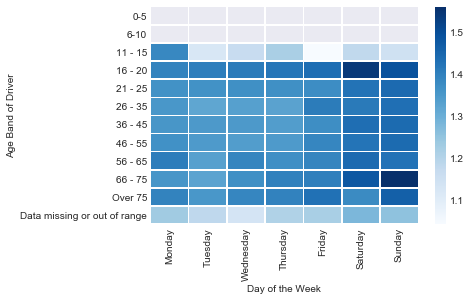

In [26]:
pt1=ScotTraffic.pivot_table(values='Number of Casualties',index='Age Band of Driver',columns='Day of the Week')
a = ["Monday", "Tuesday", "Wednesday",'Thursday','Friday','Saturday','Sunday']
b=['0-5','6-10','11 - 15','16 - 20','21 - 25','26 - 35','36 - 45','46 - 55','56 - 65','66 - 75','Over 75','Data missing or out of range']
pt1 = pt1.reindex(index=b, columns = a)
sns.heatmap(pt1,cmap='Blues',linecolor='white',linewidths=0.5)
print(pt1)

In [28]:
sns.countplotplot(x='Weather Conditions', data=ScotTraffic, hue='Accident Severity' )

AttributeError: 'module' object has no attribute 'countplotplot'

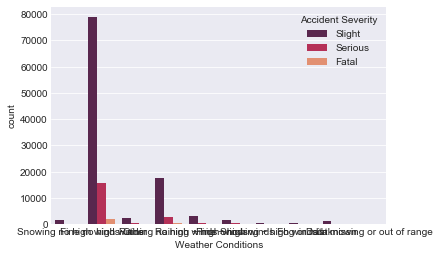

In [29]:
sns.countplot(x='Weather Conditions', data=ScotTraffic, hue='Accident Severity', palette='rocket')

In [32]:
sns.lmplot(x='Engine Capacity (CC)', y='Number of Casualties', data=ScotTraffic)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''